In [1]:
import pandas as pd

In [6]:
rating = pd.read_csv('../ratings.csv')
movies = pd.read_csv('../movies.csv')

In [52]:
rating = pd.read_csv('../ratings.csv')

In [4]:
rating.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [7]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
# new dataframe with column genre
print(movies['title'][0][-5:-1])

1995


In [54]:
secondsperyear = 31557600
rating['year'] = rating['timestamp']//secondsperyear + 1970
#print(rating['timestamp'][1000]//secondsperyear + 1970)

In [45]:
#rating.head()
rating.groupby('rating').count()

,userId,movieId,timestamp,year
rating,,,,
0.5,442388,442388,442388,442388
1.0,886233,886233,886233,886233
1.5,441354,441354,441354,441354
2.0,1850627,1850627,1850627,1850627
2.5,1373419,1373419,1373419,1373419
3.0,5515668,5515668,5515668,5515668
3.5,3404360,3404360,3404360,3404360
4.0,7394710,7394710,7394710,7394710
4.5,2373550,2373550,2373550,2373550


In [21]:
columns = [i for i in range(1995,2019)]
columns

[1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018]

In [27]:
genrelist = set()
for index, row in movies.iterrows():
    currgenres = row['genres'].split("|")
    genrelist.update(currgenres)
print(genrelist)


{'Crime', 'Drama', 'Sci-Fi', 'Comedy', 'IMAX', 'Mystery', 'Action', 'Thriller', 'Fantasy', '(no genres listed)', 'War', 'Film-Noir', 'Romance', 'Animation', 'Musical', 'Children', 'Western', 'Adventure', 'Horror', 'Documentary'}


In [38]:
genrelist = sorted(genrelist)
genrelist

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

AttributeError: 'float' object has no attribute 'type'

In [129]:
genreovertimecnt = pd.DataFrame(0.0,index=genrelist, columns=columns).astype(float)
genreovertimecnt.head()

genreovertimesum = pd.DataFrame(0.0,index=genrelist, columns=columns).astype(float)
genreovertimesum.head()
    

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
(no genres listed),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Action,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adventure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Animation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Children,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
rating.head()

,userId,movieId,rating,timestamp,year
0,1,307,3.5,1256677221,2009
1,1,481,3.5,1256677456,2009
2,1,1091,1.5,1256677471,2009
3,1,1257,4.5,1256677460,2009
4,1,1449,4.5,1256677264,2009


In [122]:
rating

,userId,movieId,rating,timestamp,year
0,1,307,3.5,1256677221,2009
1,1,481,3.5,1256677456,2009
2,1,1091,1.5,1256677471,2009
3,1,1257,4.5,1256677460,2009
4,1,1449,4.5,1256677264,2009
...,...,...,...,...,...
27753439,283228,8542,4.5,1379882795,2013
27753440,283228,8712,4.5,1379882751,2013
27753441,283228,34405,4.5,1379882889,2013
27753442,283228,44761,4.5,1354159524,2012


In [130]:
for index, row in rating.iterrows():
    year = row['year']
    movie = row['movieId']
    r = row['rating']
    y = movies.loc[movie == movies['movieId']]
    relevantgenres = movies['genres'][int(y.index.tolist()[0])]
    relevantgenrelist = relevantgenres.split('|')
    for genre in relevantgenrelist:
        genreovertimecnt[year][genre] += float(r)
        genreovertimesum[year][genre] += 5.0
        
"""
row = rating.iloc[0]
#print(row)
year = row['year']
movie = row['movieId']
#print(movie)
r = row['rating']
#print(r)
y = movies.loc[movie == movies['movieId']]

relevantgenres = movies['genres'][int(y.index.tolist()[0])]
print(y.index)
#print(movies['genres'][movie])
#print(y)
#print(relevantgenres)
relevantgenrelist = relevantgenres.split('|')
print(relevantgenrelist)
for genre in relevantgenrelist:
    genreovertimecnt[year][genre] += float(r)
    genreovertimesum[year][genre] += 5.0
"""

"\nrow = rating.iloc[0]\n#print(row)\nyear = row['year']\nmovie = row['movieId']\n#print(movie)\nr = row['rating']\n#print(r)\ny = movies.loc[movie == movies['movieId']]\n\nrelevantgenres = movies['genres'][int(y.index.tolist()[0])]\nprint(y.index)\n#print(movies['genres'][movie])\n#print(y)\n#print(relevantgenres)\nrelevantgenrelist = relevantgenres.split('|')\nprint(relevantgenrelist)\nfor genre in relevantgenrelist:\n    genreovertimecnt[year][genre] += float(r)\n    genreovertimesum[year][genre] += 5.0\n"

In [124]:
print(movies.iloc[307])

movieId                  310
title      Rent-a-Kid (1995)
genres                Comedy
Name: 307, dtype: object


In [132]:
genreovertimecnt

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
(no genres listed),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,50.5,50.5,11.5,145.0,5196.0,12150.5,22522.0,20399.5
Action,0.0,1840682.0,778887.0,299104.0,1011183.0,1774725.0,1100643.0,764166.0,917091.0,1105147.0,...,992172.0,1009126.5,848076.0,833076.5,689987.5,641714.0,2308581.5,2528183.5,2367073.5,1284252.0
Adventure,0.0,1409072.0,654070.0,222592.0,812696.0,1425959.0,844793.0,619113.0,754102.0,907129.0,...,788118.0,796957.5,669252.0,655394.5,536686.5,511393.0,1794829.0,2041100.0,1873356.5,1040765.0
Animation,0.0,362146.0,124977.0,47669.0,191004.0,322809.0,200383.0,148445.0,191456.0,222203.5,...,252259.0,264528.5,223439.0,209763.0,172597.5,168889.5,593774.5,658155.5,641515.0,358012.0
Children,0.0,644016.0,242449.0,99594.0,331736.0,557161.0,328326.0,238774.0,281947.5,322833.5,...,291681.5,304863.5,260055.5,243407.5,187231.0,166695.0,553383.0,643156.5,610775.5,345126.5
Comedy,6.0,2209600.0,972143.0,402113.0,1689197.0,2715755.0,1671820.0,1208793.0,1463726.5,1605623.0,...,1212061.5,1199561.5,1013454.5,953100.0,730779.0,655719.5,2048039.0,2292977.5,2163301.0,1175964.5
Crime,6.0,1168124.0,408674.0,179093.0,690394.0,1072071.0,689341.0,480928.0,607678.0,677327.0,...,643027.5,631049.5,527907.0,523611.0,440389.5,399667.0,1321040.0,1325681.0,1239201.0,666384.0
Documentary,0.0,28201.0,15915.0,7357.0,51135.0,65983.0,31021.0,27670.0,44302.0,60239.5,...,59273.0,58199.0,55955.5,45419.0,41342.5,37996.0,109411.5,105243.0,96590.5,60015.5
Drama,4.0,2756788.0,1183445.0,552307.0,2176006.0,3417966.0,2014499.0,1431919.0,1708054.0,1838154.0,...,1613928.0,1599961.5,1380698.5,1355993.0,1114030.5,1019688.5,3204463.5,3260470.0,3059830.5,1661801.5
Fantasy,4.0,507154.0,251427.0,93619.0,387890.0,638628.0,368220.0,294559.0,368675.5,456437.5,...,415459.0,427120.0,371099.5,341794.0,277947.0,259589.5,879062.0,980017.5,954770.0,510912.0


In [133]:
genrefracovertime = (genreovertimecnt/genreovertimesum) * 5.0
genrefracovertime

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
(no genres listed),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.156250,3.156250,3.833333,2.959184,3.040374,3.119512,3.328210,3.437732
Action,NaN,3.443546,3.548557,3.449276,3.456173,3.478053,3.466658,3.401918,3.359271,3.324030,...,3.433858,3.470257,3.498577,3.558605,3.598352,3.548636,3.543177,3.503114,3.513542,3.516812
Adventure,NaN,3.497047,3.613966,3.513575,3.521396,3.555050,3.539230,3.496490,3.479036,3.419141,...,3.461942,3.499603,3.515791,3.580843,3.629448,3.584296,3.568078,3.536559,3.544265,3.551735
Animation,NaN,3.697027,3.662759,3.578754,3.648387,3.681252,3.637705,3.596487,3.586863,3.534783,...,3.586230,3.625466,3.627492,3.651799,3.685146,3.650008,3.643079,3.587773,3.577866,3.605866
Children,NaN,3.518213,3.544421,3.360688,3.471385,3.451324,3.434193,3.362967,3.366256,3.305214,...,3.361664,3.405916,3.424892,3.469567,3.521630,3.481516,3.492742,3.459021,3.455531,3.489792
Comedy,3.0,3.425705,3.495145,3.444075,3.548860,3.505295,3.452248,3.390277,3.390202,3.335271,...,3.367633,3.391744,3.415513,3.460520,3.501509,3.476903,3.430580,3.417499,3.435878,3.437236
Crime,3.0,3.629822,3.730377,3.637883,3.760173,3.724227,3.695921,3.652636,3.607104,3.557707,...,3.666565,3.701170,3.719908,3.747922,3.771782,3.746340,3.743712,3.700539,3.715790,3.717540
Documentary,NaN,3.873764,3.766864,3.647496,3.957817,3.913350,3.763771,3.732128,3.733839,3.812385,...,3.667657,3.679289,3.658657,3.702233,3.689647,3.634590,3.632279,3.653383,3.648780,3.647915
Drama,4.0,3.715528,3.723832,3.681580,3.761729,3.730923,3.690606,3.644088,3.620876,3.586922,...,3.638398,3.647966,3.670997,3.709927,3.743131,3.723339,3.707651,3.679337,3.692589,3.691883
Fantasy,4.0,3.489408,3.564217,3.444788,3.539982,3.505401,3.500989,3.496166,3.504020,3.457729,...,3.477110,3.492796,3.525551,3.572374,3.618301,3.579508,3.544948,3.508759,3.528644,3.520084


/Users/Jenny/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

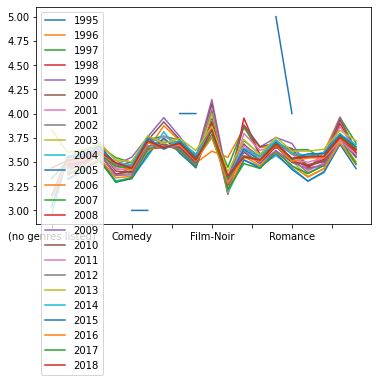

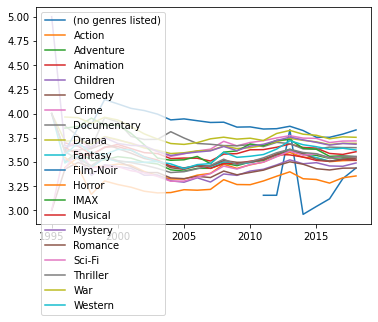

In [134]:
genrefracovertimetranspose = genrefracovertime.T
genrefracovertime.plot()
genrefracovertimetranspose.plot()

In [20]:
rating.groupby('year').count()

,userId,movieId,rating,timestamp
year,,,,
1995,4,4,4,4
1996,1732305,1732305,1732305,1732305
1997,764887,764887,764887,764887
1998,329704,329704,329704,329704
1999,1231788,1231788,1231788,1231788
2000,2031928,2031928,2031928,2031928
2001,1240627,1240627,1240627,1240627
2002,911336,911336,911336,911336
2003,1079517,1079517,1079517,1079517


In [8]:
tag = pd.read_csv('../tags.csv')
tag.head()

,userId,movieId,tag,timestamp
0,14,110,epic,1443148538
1,14,110,Medieval,1443148532
2,14,260,sci-fi,1442169410
3,14,260,space action,1442169421
4,14,318,imdb top 250,1442615195


In [12]:
rating.head(700)

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264
...,...,...,...,...
695,4,7704,4.0,1127947061
696,4,7810,4.0,1113766720
697,4,7811,4.0,1123989697
698,4,7812,4.0,1145937567


In [131]:
print(0)

0
